In [1]:
import pandas as pd
import numpy as np
data1= pd.read_csv('E:/HKUST科大学习/MSDM_5054/Homework/Homework1/BreastCancer_train.csv')
data2= pd.read_csv('E:/HKUST科大学习/MSDM_5054/Homework/Homework1/BreastCancer_test.csv')
print(data1.shape)
print(data1.info())
print(data2.shape)
print(data2.info())
#删除缺失值
data1= data1.drop_duplicates()
data1= data1.dropna()
print(data1.shape)
data2= data2.drop_duplicates()
data2= data1.dropna()
print(data2.shape)
# 保存修改后的数据到新的 Excel 文件
output_path = 'E:/HKUST科大学习/MSDM_5054/Homework/Homework1/BreastCancer_train_cleaned data_2023.10.1.xlsx'
data1.to_excel(output_path, index=False)
output_path = 'E:/HKUST科大学习/MSDM_5054/Homework/Homework1/BreastCancer_test_cleaned data_2023.10.1.xlsx'
data2.to_excel(output_path, index=False)

(400, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               400 non-null    int64  
 1   Cl.thickness     400 non-null    int64  
 2   Cell.size        400 non-null    int64  
 3   Cell.shape       400 non-null    int64  
 4   Marg.adhesion    400 non-null    int64  
 5   Epith.c.size     400 non-null    int64  
 6   Bare.nuclei      392 non-null    float64
 7   Bl.cromatin      400 non-null    int64  
 8   Normal.nucleoli  400 non-null    int64  
 9   Mitoses          400 non-null    int64  
 10  Class            400 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 34.5+ KB
None
(299, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id     

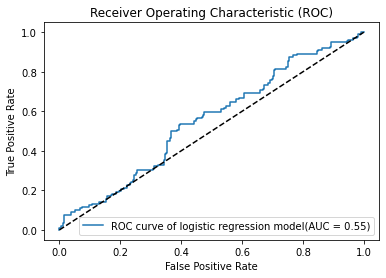

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

# 提取训练集的自变量和因变量
X_train1 = data1[['Id','Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 'Mitoses']]
y_train1 = data1['Class']

# 提取测试集的自变量和因变量
X_test1 = data2[['Id','Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 'Mitoses']]
y_test1 = data2['Class']

# 构建逻辑回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train1, y_train1)
# 进行预测
y_pred_prob1 = model.predict_proba(X_test1)[:, 1]

# 将标签映射为0和1
y_test1 = y_test1.map({'benign': 0, 'malignant': 1})
# 计算ROC曲线的参数
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob1)
roc_auc_GLM = roc_auc_score(y_test1, y_pred_prob1)

# 绘制ROC曲线
plt.plot(fpr, tpr, label='ROC curve of logistic regression model(AUC = %0.2f)' % roc_auc_GLM)
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

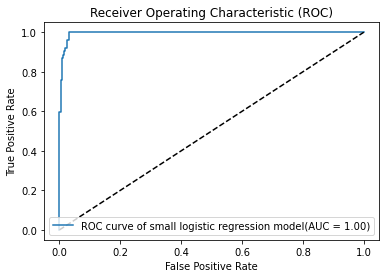

In [3]:
# 提取训练集的自变量和因变量
X_train2 = data1[['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Bare.nuclei', 'Bl.cromatin']]
y_train2 = data1['Class']

# 提取测试集的自变量和因变量
X_test2 = data2[['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Bare.nuclei', 'Bl.cromatin']]
y_test2 = data2['Class']

# 构建逻辑回归模型
model2 = LogisticRegression()

# 训练模型
model2.fit(X_train2, y_train2)
# 进行预测
y_pred_prob2 = model2.predict_proba(X_test2)[:, 1]

# 将标签映射为0和1
y_test2 = y_test2.map({'benign': 0, 'malignant': 1})
# 计算ROC曲线的参数
fpr, tpr, thresholds = roc_curve(y_test2, y_pred_prob2)
roc_auc_SmallGLM = roc_auc_score(y_test2, y_pred_prob2)

# 绘制ROC曲线
plt.plot(fpr, tpr, label='ROC curve of small logistic regression model(AUC = %0.2f)' % roc_auc_SmallGLM)
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

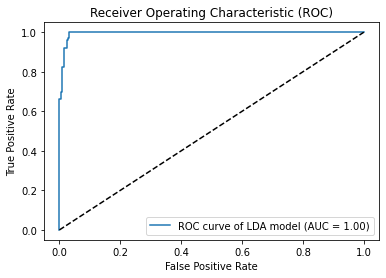

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score

# 提取训练集的自变量和因变量
X_train3 = data1[['Id', 'Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 'Mitoses']]
y_train3 = data1['Class']
# 提取测试集的自变量和因变量
X_test3 = data2[['Id', 'Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 'Mitoses']]
y_test3 = data2['Class']
# 创建LDA模型对象
lda = LinearDiscriminantAnalysis()
# 训练模型
lda.fit(X_train3, y_train3)
# 进行预测
y_pred_prob3 = lda.predict_proba(X_test3)[:, 1]
# 将标签映射为0和1
y_test3 = y_test3.map({'benign': 0, 'malignant': 1})
# 计算ROC曲线的参数
fpr, tpr, thresholds = roc_curve(y_test3, y_pred_prob3)
roc_auc_LDA = roc_auc_score(y_test3, y_pred_prob3)

# 绘制ROC曲线
plt.plot(fpr, tpr, label='ROC curve of LDA model (AUC = %0.2f)' % roc_auc_LDA)
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

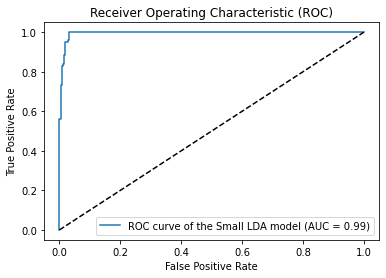

In [5]:
# 提取训练集的自变量和因变量
X_train4 = data1[['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Bare.nuclei', 'Bl.cromatin']]
y_train4 = data1['Class']
# 提取测试集的自变量和因变量
X_test4 = data2[['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Bare.nuclei', 'Bl.cromatin']]
y_test4 = data2['Class']
# 创建LDA模型对象
lda2 = LinearDiscriminantAnalysis()
# 训练模型
lda.fit(X_train4, y_train4)
# 进行预测
y_pred_prob4 = lda.predict_proba(X_test4)[:, 1]
# 将标签映射为0和1
y_test4 = y_test4.map({'benign': 0, 'malignant': 1})
# 计算ROC曲线的参数
fpr, tpr, thresholds = roc_curve(y_test4, y_pred_prob4)
roc_auc_SmallLDA = roc_auc_score(y_test4, y_pred_prob4)

# 绘制ROC曲线
plt.plot(fpr, tpr, label='ROC curve of the Small LDA model (AUC = %0.2f)' % roc_auc_SmallLDA)
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

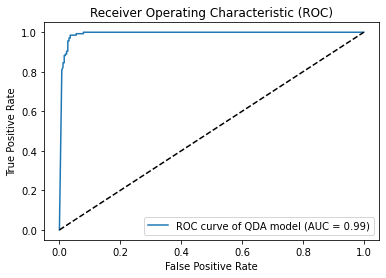

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score

# 提取训练集的自变量和因变量
X_train5 = data1[['Id', 'Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 'Mitoses']]
y_train5 = data1['Class']
# 提取测试集的自变量和因变量
X_test5 = data2[['Id', 'Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 'Mitoses']]
y_test5 = data2['Class']
# 创建QDA模型对象
qda = QuadraticDiscriminantAnalysis()
# 训练模型
qda.fit(X_train5, y_train5)
# 进行预测
y_pred_prob5 = qda.predict_proba(X_test5)[:, 1]
# 将标签映射为0和1
y_test5 = y_test5.map({'benign': 0, 'malignant': 1})
# 计算ROC曲线的参数
fpr, tpr, thresholds = roc_curve(y_test5, y_pred_prob5)
roc_auc_QDA = roc_auc_score(y_test5, y_pred_prob5)

# 绘制ROC曲线
plt.plot(fpr, tpr, label='ROC curve of QDA model (AUC = %0.2f)' % roc_auc_QDA)
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [7]:
print("AUC_GLM:", roc_auc_GLM)
print("AUC_SmallGLM:", roc_auc_SmallGLM)
print("AUC_LDA:", roc_auc_LDA)
print("AUC_SmallLDA:", roc_auc_SmallLDA)
print("AUC_QDA:", roc_auc_QDA)

AUC_GLM: 0.5522811486799444
AUC_SmallGLM: 0.9954840203798054
AUC_LDA: 0.9951945345067161
AUC_SmallLDA: 0.9949050486336267
AUC_QDA: 0.9919522927281149
